In [1]:
import numpy as np

PG

In [2]:
lamda = 2
A = np.mat([[3,0.5],[0.5,1]])
w = np.mat([[3],[-1]])
myu = np.array([[1],[2]])
Lipsitz = np.max(np.linalg.eigvals(2*A))

In [3]:
def f(A,w,myu,lamda):
    return (np.dot(np.dot((w-myu).T,A),(w-myu)) + lamda*np.linalg.norm(w,1))[0,0]

def grad(A,w,myu):
    return 2*np.dot(A,(w - myu))# + lamda*np.sign(w)

def soft_thresh(update,threshold):
    return np.multiply(np.sign(update),np.maximum(0, np.abs(update)-threshold))
    #return np.multiply(np.sign(value), np.maximum(np.zeros(np.shape(value)), np.abs(value) - lamda))

In [4]:
J_list = []
W = []
for i in range(100):
    J_list.append(f(A,w,myu,lamda))
    W.append((w[0,0],w[1,0]))
    w = soft_thresh(w-grad(A,w,myu)/Lipsitz, lamda/Lipsitz)
print(w)
J = f(A,w,myu,lamda)
#J_list
res = []
for element in W:
    res.append(np.linalg.norm((element[0]-w[0,0],element[0]-w[1,0])))

[[ 0.81818182]
 [ 1.09090909]]


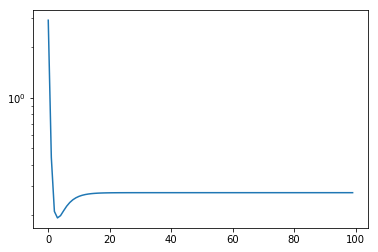

In [5]:
import matplotlib.pyplot as plt
plt.yscale('log') 
plt.plot(res)
plt.show()

APG

In [6]:
A = np.mat([[3,0.5],[0.5,1]])
w = np.mat([[3],[-1]])
myu = np.array([[1],[2]])
Lipsitz = np.max(np.linalg.eigvals(2*A))

In [7]:
def q(t):
    return (t-1)/(t+2)

In [8]:
J_list_APG = []
J_list_APG.append(f(A,w,myu,lamda))
w_pre = w
w = soft_thresh(w-grad(A,w_pre,myu)/Lipsitz, lamda/Lipsitz)
for i in range(1,150):
    v =w + q(i) *(w - w_pre)
    w_pre = w
    J_list_APG.append(f(A,w,myu,lamda))
    w = soft_thresh(v-grad(A,v,myu)/Lipsitz, lamda/Lipsitz)
print(w)
J_APG = f(A,w,myu,lamda)

[[ 0.81818182]
 [ 1.09090909]]


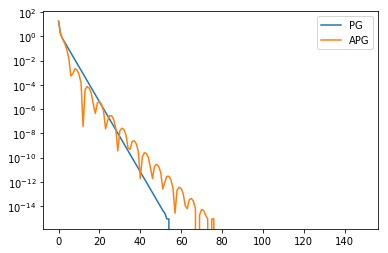

In [9]:
import matplotlib.pyplot as plt
plt.yscale('log') 
plt.plot(J_list - J)
plt.plot(J_list_APG-J_APG)
plt.legend(['PG','APG'])
plt.show()